In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, cluster_std=1.5)

print(X.shape, y.shape)

(100, 2) (100,)


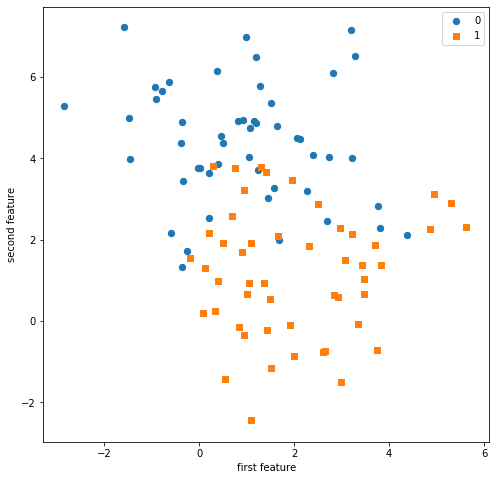

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1',
            marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
classifier = LogisticRegression()

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
prediction = classifier.predict(X_test)

In [9]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


In [10]:
np.mean(prediction == y_test)

0.8

In [11]:
classifier.score(X_test, y_test)

0.8

In [12]:
classifier.coef_

array([[ 0.61747186, -1.31072543]])

In [13]:
classifier.intercept_

array([2.49442273])

In [14]:
a = np.arange(-2, 7)
b = (a*classifier.coef_[0,0]) + classifier.coef_[0,1] + classifier.intercept_[0] # Not certain if this is correct

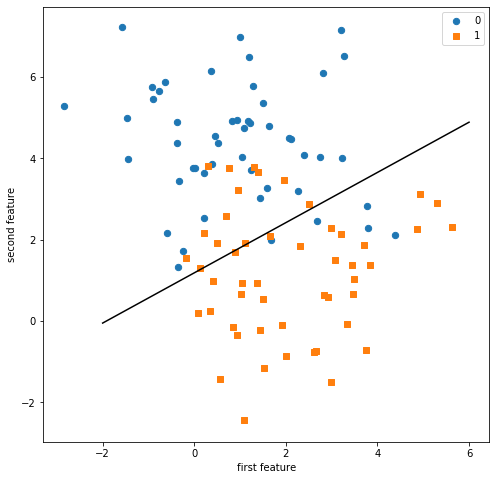

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1',
            marker='s')

plt.plot(a,b, color='black')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=30) # larger number of neighbors smooths out the seperator line - see the premade notebooks

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [22]:
knn.score(X_train, y_train)

0.88

In [23]:
knn.score(X_test, y_test)

0.8

In [24]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [31]:
X = iris.data
y = iris.target

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, 
                                                    random_state=123, stratify=y)

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
knn.score(X_test, y_test)

0.8947368421052632

In [36]:
knn.score(X_train, y_train)

1.0

In [41]:
all_scores = []
best_score = [0,0]
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    scores = (i, train_score, test_score)
    all_scores.append(scores)
    if test_score > best_score[1]:
        best_score[1] = test_score
        best_score[0] = i
    else:
        continue

print(all_scores)
print(best_score)

[(1, 1.0, 0.8947368421052632), (2, 0.9910714285714286, 0.8947368421052632), (3, 0.9732142857142857, 0.9210526315789473), (4, 0.9821428571428571, 0.9473684210526315), (5, 0.9821428571428571, 0.9736842105263158), (6, 0.9732142857142857, 0.9473684210526315), (7, 0.9732142857142857, 0.9473684210526315), (8, 0.9732142857142857, 0.9473684210526315), (9, 0.9732142857142857, 0.9210526315789473), (10, 0.9732142857142857, 0.8947368421052632), (11, 0.9732142857142857, 0.9210526315789473), (12, 0.9642857142857143, 0.9210526315789473), (13, 0.9732142857142857, 0.9210526315789473), (14, 0.9732142857142857, 0.9473684210526315), (15, 0.9821428571428571, 0.9210526315789473), (16, 0.9642857142857143, 0.9210526315789473), (17, 0.9642857142857143, 0.9210526315789473), (18, 0.9642857142857143, 0.868421052631579), (19, 0.9732142857142857, 0.868421052631579), (20, 0.9732142857142857, 0.868421052631579), (21, 0.9732142857142857, 0.868421052631579), (22, 0.9642857142857143, 0.868421052631579), (23, 0.955357142